# CSE 252A Computer Vision I Fall 2021 - Assignment 1

## Instructor: Ben Ochoa

- Assignment Published On: **Wed, October 6, 2021**.

- Due On: **Wed, October 20, 2021 11:59 PM (Pacific Time)**.

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:
 
- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu/courses/21788).

- All the solutions must be written in this Jupyter notebook.

- After finishing the assignment in the notebook, please export the notebook as a PDF and submit both the notebook and the PDF (i.e. the `.ipynb` and the `.pdf` files) on Gradescope.

- You may use basic algebra packages (e.g. `NumPy`, `SciPy`, etc) but you are not allowed to use the packages that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

**Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances. 

### Problem 1: Geometry (15 points)

Consider a line in the 2D plane, whose equation is given by $a\tilde{x} + b\tilde{y} + c = 0$, where $\boldsymbol{l} = (a, b, c)^\top$ and $\boldsymbol{x} = (\tilde{x}, \tilde{y}, 1)^\top$. Noticing that $\boldsymbol{x}$ is a homogeneous representation of $\tilde{\boldsymbol{x}} = (\tilde{x}, \tilde{y})^\top$, we can view $\boldsymbol{l}$ as a homogeneous representation of the line $a\tilde{x} + b\tilde{y} + c = 0$.  We see that the line is also defined up to a scale since $(a, b, c)^\top$ and  $k(a, b, c)^\top$ with $k\neq0$ represents the same line.



1. [6 points] Prove $x^{T}l+l^{T}x=0$, if a point $x$ in homogeneous coordinates lies on the homogeneous line $l$.

2. [2 points] What is the line, in homogenous coordinates, joining the inhomogeneous points $(1, 7)$ and $(5,-8)$.

3. [2 points] Find a vector that is a homogeneous representation of the line that passes through the points (1, 5) and (−3, 2). 

4. [5 points] Consider the intersection of two lines $l_1$ and $l_2$. Prove that the homogeneous point of intersection, $x$, of two homogeneous lines $l_1$ and $l_2$ is $x = l_1 \times l_2$, where × stands for the vector (or cross) product.


#### Solution:

1. Denote $\boldsymbol{x} = (\tilde{x}, \tilde{y}, 1)^\top$, $\boldsymbol{l} = (a, b, c)^\top$. 

    Since $\boldsymbol{x}$ is a point on line $\boldsymbol{l}$, $\boldsymbol{l}^\top \boldsymbol{x} = 0$

    $\boldsymbol{x}^\top \boldsymbol{l} = \tilde{x}a+\tilde{y}b+c = 0$

    Therefore, $\boldsymbol{x}^\top \boldsymbol{l}+\boldsymbol{l}^\top \boldsymbol{x} = 0$
    
2. The equation of the line in the 2D plane is $15x+4y-43 = 0$.

    Therefore, in homogenous coordinates, the line is denoted as $(15,4,-43)^\top$.
    
3. The equation of the line in the 2D plane is $3x-4y+17 = 0$.

    Therefore, in homogenous coordinates, the line is denoted as $(3, -4, 17)^\top$.
    
4. Denote $\boldsymbol{l_1} = (a_1,b_1,c_1)$, $\boldsymbol{l_2} = (a_2, b_2, c_2)$, then,

    $$
    \begin{cases}
    a_1 x + b_1 y +c_1 = 0\\
    a_2 x + b_2 y +c_2 = 0\\
    \end{cases}
    $$

    From this equation set, we can get:

    $$
    \begin{cases}
    x = \frac{b_1 c_2 - b_2 c_1}{a_1 b_2 - a_2 b_1}\\
    y = \frac{a_1 c_2 - a_2 c_1}{a_2 b_1 - a_1 b_2}\\
    \end{cases}
    $$

    Therefore, the homogeneous representation of the intersection point is 

    $(\frac{b_1 c_2 - b_2 c_1}{a_1 b_2 - a_2 b_1}, \frac{a_1 c_2 - a_2 c_1}{a_2 b_1 - a_1 b_2}, 1) = (b_1 c_2 - b_2 c_1, a_2 c_1 - a_1 c_2, a_1 b_2 - a_2 b_1)  = l_1 \times l_2$


## Problem 2: Image Formation and Rigid Body Transformations (17 points)

In  this  problem  we  will  practice  rigid  body  transformations  and  image  formations  through  the projective camera model. The goal will be to photograph the following four points 
$\widetilde{\boldsymbol{X}}_1 = [\text{-3 -6 4}]^T$,  $\widetilde{\boldsymbol{X}}_2 = [\text{3 -6 4}]^T$, $\widetilde{\boldsymbol{X}}_3 = [\text{3 6 4}]^T$, $\widetilde{\boldsymbol{X}}_4 = [\text{-3 6 4}]^T$ in the world coordinate frame. First, recall the following formula for rigid body transformation
$$
\widetilde{\boldsymbol{X}}_{cam} = \text{ } R\widetilde{\boldsymbol{X}} +  \boldsymbol{t}
$$
Where $\widetilde{\boldsymbol{X}}_{cam}$ is the point coordinate in the camera coordinate system. $\widetilde{\boldsymbol{X}}$ is a point in the world coordinate frame, and $\text{R}$ and $\boldsymbol{t}$ are the rotation and translation that transform points from the world coordinate frame to the camera coordinate frame. Together, $\text{R}$ and $\boldsymbol{t}$ are the $\textit{extrinsic}$ camera parameters. Once transformed to the camera coordinate frame, the points can be photographed using the $3 \times 3$ camera calibration matrix $\text{K}$, which embodies the $\textit{intrinsic}$ camera parameters, and the canonical projection matrix $[\text{I} | \boldsymbol{0}]$. Given $\text{K}, \text{R}$, and $\boldsymbol{t}$, the image of a point $\widetilde{\boldsymbol{X}}$ is $\boldsymbol{x} = \text{K}[\text{I} | \boldsymbol{0}]\boldsymbol{X}_\text{Cam} = \text{K}[\text{R} | \boldsymbol{t}]\boldsymbol{X}$, where the homogeneous points $\boldsymbol{X}_\text{Cam} = (\widetilde{\boldsymbol{X}}_\text{Cam}^\top, 1)^\top$ and $\boldsymbol{X} = (\widetilde{\boldsymbol{X}}^\top, 1)^\top$. We will consider four different settings of focal length, viewing angles and camera positions below. 

a). The extrinsic transformation matrix,

b). Intrinsic camera matrix under the perspective camera assumption.

c). Calculate the image of the four vertices and plot using the supplied **plot_points** function (see e.g.  output in figure below).

![fig3](fig3.png)

1. [No rigid body transformation]. Focal  length  =  1. The  optical  axis  of  the  camera  is aligned with the z-axis.
2. [Translation]. Focal  length  =  1. $\boldsymbol{t} = [\text{0 0 2}]^T$. The optical axis of the camera is aligned with the z-axis.
3. [Translation and Rotation]. Focal length = 1. $\text{}R$ encodes a 60 degrees around the z-axis and then 30 degrees around the y-axis. $\boldsymbol{t} = [\text{0 0 2}]^T$.
4. [Translation and Rotation, long distance]. Focal length = 5. $\text{}R$ encodes a 60 degrees around the z-axis and then 30 degrees around the y-axis. $\boldsymbol{t} = [\text{0 0 7}]^T$.

We will not use a full intrinsic camera matrix (e.g.  that maps centimeters to pixels, and defines  the  coordinates  of  the  center  of  the  image),  but  only  parameterize  this  with f,  the  focal
length.  In other words:  the only parameter in the intrinsic camera matrix under the perspective assumption is f.

For all the four cases, include a image like above.  Note that the axis are the same for each row, to facilitate comparison between the two camera models. Note: the angles and offsets used to generate these plots may be different from those in the problem statement, it's just to illustrate how to report your results.

Also, Explain why you observe any distortions in the projection, if any, under this model.

Int: [[1 0 0]
 [0 1 0]
 [0 0 1]]
Ext: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


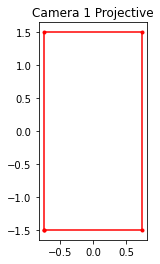

Int: [[1 0 0]
 [0 1 0]
 [0 0 1]]
Ext: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 2.]]


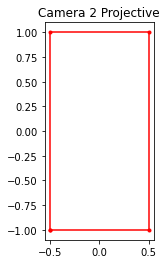

Int: [[1 0 0]
 [0 1 0]
 [0 0 1]]
Ext: [[ 0.4330127 -0.75       0.5        0.       ]
 [ 0.8660254  0.5        0.         0.       ]
 [-0.25       0.4330127  0.8660254  2.       ]]


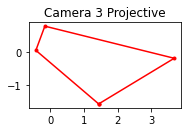

Int: [[5 0 0]
 [0 5 0]
 [0 0 1]]
Ext: [[ 0.4330127 -0.75       0.5        0.       ]
 [ 0.8660254  0.5        0.         0.       ]
 [-0.25       0.4330127  0.8660254  7.       ]]


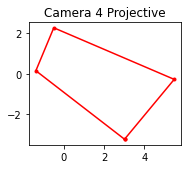

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# convert points from euclidean to homogeneous
def to_homog(points): #here always remember that points is a 3x4 matrix
    # write your code here
    homo_points = np.vstack([points, np.ones((1,4))])
    return homo_points

# convert points from homogeneous to euclidean
def from_homog(points_homog):
    # write your code here
    w = points_homog[-1,:]
    euclid_points = (points_homog/w)[:-1,:]
    return euclid_points

# project 3D euclidean points to 2D euclidean
def project_points(P_int, P_ext, pts):
    # write your code here
    homo_pts = to_homog(pts)
    # print(homo_pts)
    pts_ext = np.matmul(P_ext,homo_pts)
    
    pts_int = np.matmul(P_int,pts_ext)
    # print(pts_int)
    pts_2d = from_homog(pts_int)
    # print(pts_2d)
    
    #return the 2d euclidean points
    # pts_2d=np.zeros([2,1])
    return pts_2d


# Change the three matrices for the four cases as described in the problem
# in the four camera functions given below. Make sure that we can see the formula
# (if one exists) being used to fill in the matrices. Feel free to document with
# comments any thing you feel the need to explain. 

# given the focal length, compute the intrinsic camera matrix

def intrinsic_cam_mat(f):
    """
    K = [f 0 0
         0 f 0
         0 0 1] 
    """
    # write your code here
    int_cam_mat = np.array([[f,0,0],[0,f,0],[0,0,1]])
#     print("intrinsic:")
#     print(int_cam_mat)
    return int_cam_mat

# Compute the extrinsic camera matrix
def extrinsic_cam_mat(angles, t):
    """
        ext_cam_mat = [R|t]
    """
    # write your code here
    R_x = np.array([[1,0,0],[0,np.cos(angles[0]),-np.sin(angles[0])],[0,np.sin(angles[0]),np.cos(angles[0])]])
    R_y = np.array([[np.cos(angles[1]),0,np.sin(angles[1])],[0,1,0],[-np.sin(angles[1]),0,np.cos(angles[1])]])
    R_z = np.array([[np.cos(angles[2]),-np.sin(angles[2]),0],[np.sin(angles[2]),np.cos(angles[2]),0],[0,0,1]])
    R = np.matmul(np.matmul(R_x, R_y),R_z)
    # R = np.matmul(np.matmul(R_z, R_y),R_x)
    ext_cam_mat = np.hstack((R,t))
#     print("extrinsic:")
#     print(ext_cam_mat)
    return ext_cam_mat

def camera1():
    """
    replace with your code
    """
    # write your code here
    P_int_proj = intrinsic_cam_mat(1)
    angles = np.array([0,0,0])
    t = np.array([[0,0,0]]).T
    P_ext = extrinsic_cam_mat(angles, t)
    return P_int_proj, P_ext

def camera2():
    """
    replace with your code
    """
    # write your code here
    P_int_proj = intrinsic_cam_mat(1)
    angles = np.array([0,0,0])
    t = np.array([[0,0,2]]).T
    P_ext = extrinsic_cam_mat(angles, t)
    return P_int_proj, P_ext

def camera3():
    """
    replace with your code
    """
    # write your code here
    P_int_proj = intrinsic_cam_mat(1)
    angles = np.array([0,30,60])*np.pi/180
    t = np.array([[0,0,2]]).T
    P_ext = extrinsic_cam_mat(angles, t)
    return P_int_proj, P_ext

def camera4():
    """
    replace with your code
    """
    # write your code here
    P_int_proj = intrinsic_cam_mat(5)
    angles = np.array([0,30,60])*np.pi/180
    t = np.array([[0,0,7]]).T
    P_ext = extrinsic_cam_mat(angles, t)
    return P_int_proj, P_ext


#######################################################
# test code. Do not modify
#######################################################

def plot_points(points, title='', style='.-r', axis=[]):
    inds = list(range(points.shape[1]))+[0]
    plt.plot(points[0,inds], points[1,inds],style)
    if title:
        plt.title(title)
    if axis:
        plt.axis('scaled')
        #plt.axis(axis)
        
def main():
    point1 = np.array([[-3,-6,4]]).T
    point2 = np.array([[3,-6,4]]).T
    point3 = np.array([[3,6,4]]).T
    point4 = np.array([[-3,6,4]]).T
    points = np.hstack((point1,point2,point3,point4))
    
    for i, camera in enumerate([camera1, camera2, camera3, camera4]):
        P_int_proj, P_ext = camera()
        print("Int:", P_int_proj)
        print("Ext:", P_ext)
        plt.subplot(1, 2, 1)
        plot_points(project_points(P_int_proj, P_ext, points), title='Camera %d Projective'%(i+1), axis=[-1,1,-1,1])
        plt.show()

main()

## Problem 3: Surface Rendering (18 pts)

In this portion of the assignment we will be exploring different methods of approximating local reflectance of
objects in a scene. This last section of the homework will be an exercise in rendering surfaces. Here, you need use the surface normals and the masks from the provided pickle files, with various light sources, different materials, and using a number of reflectance models. For the sake of simplicity, multiple reflections of light rays, and occlusion of light rays due to object/scene can be ignored.

### Data

The surface normals and masks are to be loaded from the respective pickle files. For comparison, You should display the rendering results for both normals calculated from the original image and the diffuse components. There are 2 images that we will be playing with namely one of a sphere and the other of a pear.

Assume that the albedo map is uniform.

### Lambertian Reflectance

One of the simplest models available to render 3D objections with reflectance is the Lambertian model. This
model finds the apparent brightness to an observer using the direction of the light source $\mathbf{L}$ and the normal
vector on the surface of the object $\mathbf{N}$. The brightness intensity at a given point on an object’s surface, $\mathbf{I_d}$, with
a single light source is found using the following relationship:

$$\mathbf{I_d} = \mathbf{L} \cdot \mathbf{N} (I_l\mathbf{C})$$

where, $\mathbf{C}$ and $I_l$ are the the color and intensity of the light source respectively.

### Phong Reflectance

One major drawback of Lambertian reflectance is that it only considers the diffuse light in its calculation of
brightness intensity. One other major component to reflectance rendering is the specular component. The
specular reflectance is the component of light that is reflected in a single direction, as opposed to all directions,
which is the case in diffuse reflectance. One of the most used models to compute surface brightness with specular
components is the Phong reflectance model. This model combines ambient lighting, diffused reflectance as well
as specular reflectance to find the brightness on a surface. Phong shading also considers the material in the scene
which is characterized by four values: the ambient reflection constant ($k_a$), the diffuse reflection constant ($k_d$),
the specular reflection constant ($k_s$) and $\alpha$ the Phong constant, which is the ‘shininess’ of an object. Furthermore,
since the specular component produces ‘rays’, only some of which would be observed by a single observer, the
observer’s viewing direction ($\mathbf{V}$) must also be known. For some scene with known material parameters with $M$
light sources the light intensity $\mathbf{I}_{phong}$ on a surface with normal vector $\mathbf{N}$ seen from viewing direction $\mathbf{V}$ can be
computed by:

$$\mathbf{I}_{phong} = k_{a}\mathbf{I}_{a} + \sum_{m\in M}\left\{k_d(\mathbf{L}_{m}\cdot\mathbf{N})\mathbf{I}_{m,d} + k_{s}(\mathbf{R}_{m}\cdot\mathbf{V})^{\alpha}\mathbf{I}_{m,s}\right\}\text{,}$$

$$\mathbf{R}_{m} = 2\mathbf{N}(\mathbf{L}_{m}\cdot\mathbf{N}) - \mathbf{L}_{m}\text{,}$$

where $\mathbf{I}_{a}$, is the color and intensity of the ambient lighting, $\mathbf{I}_{m,d}$ and $\mathbf{I}_{m,s}$ are the color values for the diffuse and
specular light of the $m$th light source.

### Rendering

Please complete the following:

1. Write the function `lambertian()` that calculates the Lambertian light intensity given the light direction $\mathbf{L}$ with color and intensity $\mathbf{C}$ and $I_l = 1$, and normal vector $\mathbf{N}$. Then use this function in a program that calculates and displays the specular sphere and the pear using each of the two lighting sources found in Table 1. *Note: You do not need to worry about material coefficients in this model.*

1. Write the function `phong()` that calculates the Phong light intensity given the material constants $(k_a, k_d, k_s, \alpha)$, $\mathbf{V} = (0, 0, 1)^\top$, $\mathbf{N}$ and some number of $M$ light sources. Then use this function in a program that calculates and displays the specular sphere and the pear using each of the sets of coefficients found in Table 2 with each light source individually, and both light sources combined.

*Hint: To avoid artifacts due to shadows, ensure that any negative intensities found are set to zero.*


Table 1: Light Sources

| $m$ | Location | Color (RGB)  |
| - | ----------- | ----- |
| 1 | $(-\tfrac{1}{2},\tfrac{1}{2},\tfrac{1}{2})^{\top}$ | $(1,1,1)$ |
| 2 | $(1,0,0)^{\top}$     | $(1,.5,1)$ |

Table 2: Material Coefficients

| Mat. | $k_a$ | $k_d$ | $k_s$ | $\alpha$ |
| - | -------- | ----- | ----- | -------- |
| 1 | $0$ | $0.1$ | $0.5$ | $5$ |
| 2 | $0$ | $0.5$ | $0.1$ | $5$ |
| 3 | $0$ | $0.5$ | $0.5$ | $10$ |

### Part 1. Loading pickle files and plotting the normals [4 pts] (Sphere - 2pts, Pear - 2pts)
In this first part, you are required to work with 2 images, one of a sphere and the other one of a pear. The pickle file normals.pickle is a list consisting of 4 numpy matrices which are    
1) Normal Vectors for the sphere with specularities removed (Diffuse component)  
2) Normal Vector for the sphere    
3) Normal Vectors for the pear with specularities removed (Diffuse component)  
4) Normal vectors for the pear  
Please load the normals and plot them using the function plot_normals which is provided.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def plot_normals(diffuse_normals, original_normals):
    # Stride in the plot, you may want to adjust it to different images
    stride = 5
    
    normalss = diffuse_normals
    normalss1 = original_normals
    
    print("Normals:")
    print("Diffuse")
    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normalss[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normalss[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normalss[..., 2])
    plt.show()
    print("Original")
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normalss1[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normalss1[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normalss1[..., 2])
    plt.show()

<class 'numpy.ndarray'>
(455, 455, 3)
Normals:
Diffuse


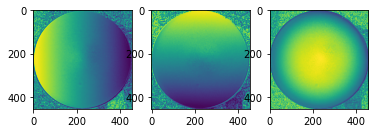

Original


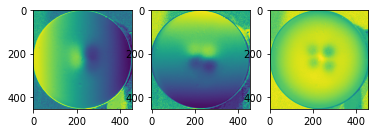

Normals:
Diffuse


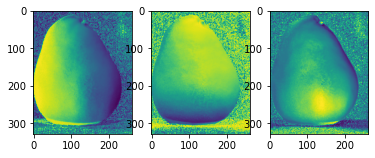

Original


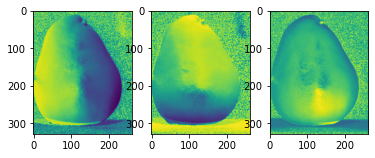

In [4]:
#Plot the normals for the sphere and pear for both the normal and diffuse components.
#1 : Load the different normals
# LOAD HERE
import pickle
with open('normals.pkl','rb')as f1:
    sphere_diffuse, sphere, pear_diffuse, pear = pickle.load(f1)
    
print(type(sphere_diffuse))
print(sphere_diffuse.shape)
    
#2 : Plot the normals using plot_normals
#What do you observe? What are the differences between the diffuse component and the original images shown?

#PLOT HERE
plot_normals(sphere_diffuse, sphere)
plot_normals(pear_diffuse, pear)

### Part 2. Lambertian model [6 pts]

Fill in your implementation for the rendered image using the lambertian model.

In [5]:
def normalize(img):
    assert img.shape[2] == 3
    maxi = img.max()
    mini = img.min()
    return (img - mini)/(maxi-mini)

In [6]:
def lambertian(normals, lights, color, intensity, mask):
    '''Your implementation'''
    n = normals
    image = np.dot(n,lights)*intensity*color
#     image = np.zeros((normals.shape[0], normals.shape[1], 3))
#     for i in range(normals.shape[0]):
#         for j in range(normals.shape[1]):
#             image[i,j,:] = np.dot(n[i,j,:], lights) * intensity * color

#     print(image.shape)
    image[:,:,0] = image[:,:,0]*mask
    image[:,:,1] = image[:,:,1]*mask
    image[:,:,2] = image[:,:,2]*mask
    image[image<0] = 0
    image = normalize(image)
    
    
    #image = np.ones((normals.shape[0], normals.shape[1], 3))
    
    return (image)

Plot the rendered results for both the sphere and the pear for both the original and the diffuse components. Remember to first load the masks from the masks.pkl file. The masks.pkl file is a list consisting of 2 numpy arrays-  
1)Mask for the sphere  
2)Mask for the pear  
Remember to plot the normalized image using the function normalize which is provided.

Dirn1,color1:


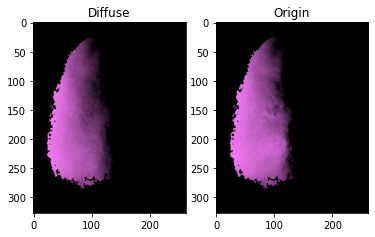

Dirn2,color2:


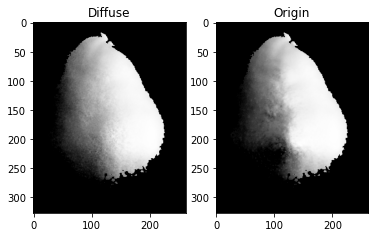

In [7]:
# Load the masks for the sphere and pear
# LOAD HERE

with open('masks.pkl' ,'rb') as f2:
    sphere_mask, pear_mask = pickle.load(f2)
    

# Output the rendering results for Pear
dirn1 = np.array([[1.0],[0],[0]])
color1 = np.array([[1,.5,1]])
dirn2 = np.array([[-1.0/2],[1.0/2],[1.0/2]])
color2 = np.array([[1,1,1]])

#Display the rendering results for pear for both diffuse and for both the light sources
print('Dirn1,color1:')
result1 = lambertian(pear_diffuse, dirn1, color1, 1 , pear_mask)
result2 = lambertian(pear, dirn1, color1, 1 , pear_mask)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('Diffuse')
ax1.imshow(result1)
ax2 = fig.add_subplot(122)
ax2.set_title('Origin')
ax2.imshow(result2)

plt.show()



print('Dirn2,color2:')
result1 = lambertian(pear_diffuse, dirn2, color2, 1 , pear_mask)
result2 = lambertian(pear, dirn2, color2, 1 , pear_mask)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('Diffuse')
ax1.imshow(result1)
ax2 = fig.add_subplot(122)
ax2.set_title('Origin')
ax2.imshow(result2)
plt.show()


Dirn1,color1:


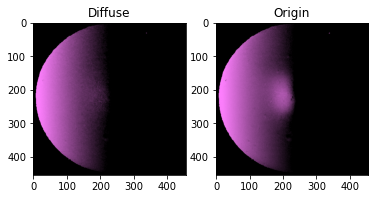

Dirn2,color2:


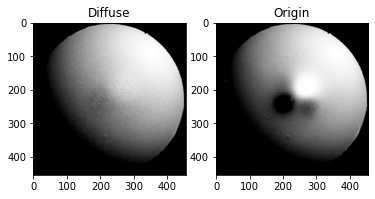

In [8]:
# Output the rendering results for Sphere
dirn1 = np.array([[1.0],[0],[0]])
color1 = np.array([[1,.5,1]])
dirn2 = np.array([[-1.0/2],[1.0/2],[1.0/2]])
color2 = np.array([[1,1,1]])
#Display the rendering results for sphere for both diffuse and for both the light sources
print('Dirn1,color1:')
result1 = lambertian(sphere_diffuse, dirn1, color1, 1 , sphere_mask)
result2 = lambertian(sphere, dirn1, color1, 1 , sphere_mask)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('Diffuse')
ax1.imshow(result1)
ax2 = fig.add_subplot(122)
ax2.set_title('Origin')
ax2.imshow(result2)

plt.show()


print('Dirn2,color2:')
result1 = lambertian(sphere_diffuse, dirn2, color2, 1 , sphere_mask)
result2 = lambertian(sphere, dirn2, color2, 1 , sphere_mask)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('Diffuse')
ax1.imshow(result1)
ax2 = fig.add_subplot(122)
ax2.set_title('Origin')
ax2.imshow(result2)
plt.show()


### Part 3. Phong model [8 pts]

Please fill in your implementation for the Phong model below.

In [9]:
def phong(normals, lights, color, material, view, mask):
    '''Your implementation'''
    # cos = np.dot(normals, lights)
    image = np.zeros((normals.shape[0],normals.shape[1],normals.shape[2]))
    for i in range(lights.shape[1]):
        image += phong_i(normals, lights[:,i], color[:,i], material, view, mask)
        
    # image[image<0] = 0
    image = normalize(image)
    return (image)

def phong_i(normals, lights_i, color_i, material, view, mask):
    R_m = np.zeros((normals.shape[0],normals.shape[1],normals.shape[2]))
    for i in range(normals.shape[0]):
        for j in range(normals.shape[1]):
            R_m[i,j,:] = 2*np.dot(normals[i,j,:],lights_i)*normals[i,j,:] - lights_i
    image = np.zeros((normals.shape[0],normals.shape[1],normals.shape[2]))
    for i in range(normals.shape[0]):
        for j in range(normals.shape[1]):
            image[i,j,:] = material[0] * np.dot(normals[i,j,:],lights_i)*color_i + \
            material[1] * np.power(np.dot(R_m[i,j,:],view),material[2])*color_i
    
    image[:,:,0] = image[:,:,0]*mask
    image[:,:,1] = image[:,:,1]*mask
    image[:,:,2] = image[:,:,2]*mask
    image[image<0] = 0
    
    return (image)

With the function completed, plot the rendering results for the sphere and pear (both diffuse and original compnents) for all the materials and light sources and also with the combination of both the light sources.

Diffuse Sphere


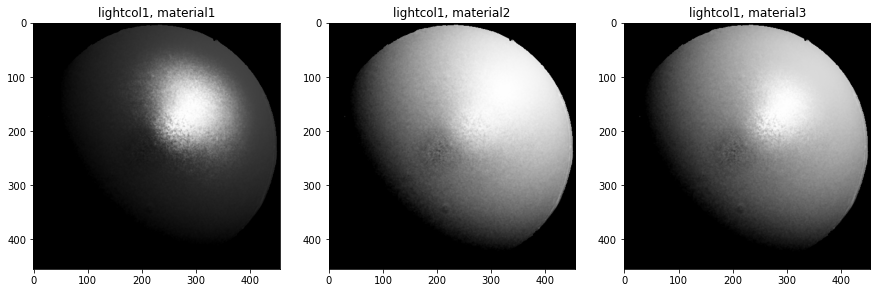

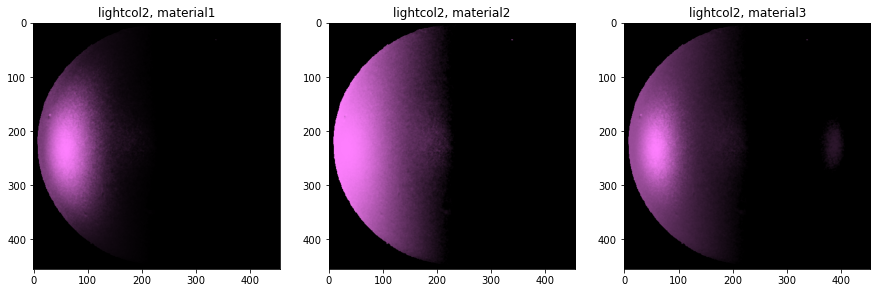

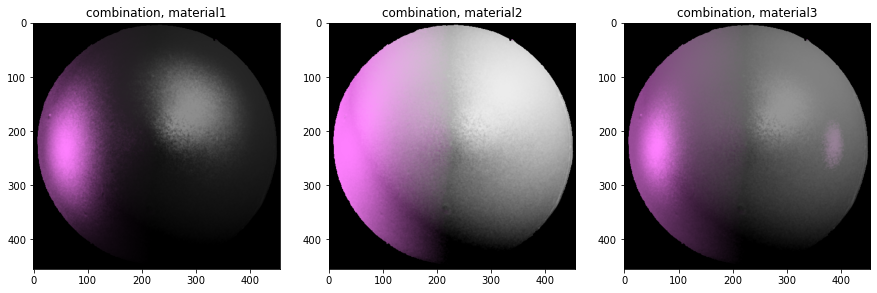

In [10]:
# Output the rendering results for sphere
view =  np.array([[0],[0],[1]])
material = np.array([[0.1,0.5,5],[0.5,0.1,5],[0.5,0.5,10]])
lightcol1 =  np.array([[-1.0/2,1],[1.0/2,1],[1.0/2,1]])
lightcol2 = np.array([[1,1],[0,0.5],[0,1]])
#Display rendered results for sphere for all materials and light sources and combination of light sources
light_direction = np.hstack([lightcol1[:,0,None],lightcol2[:,0,None]])
# print(light_direction)

light_color = np.hstack([lightcol1[:,1,None],lightcol2[:,1,None]])
# print(light_color)

print('Diffuse Sphere')
result1 = phong(sphere_diffuse, light_direction[:,0,None], light_color[:,0,None], material[0], view, sphere_mask)
result2 = phong(sphere_diffuse, light_direction[:,0,None], light_color[:,0,None], material[1], view, sphere_mask)
result3 = phong(sphere_diffuse, light_direction[:,0,None], light_color[:,0,None], material[2], view, sphere_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('lightcol1, material1')
ax1.imshow(result1)
ax2 = fig.add_subplot(132)
ax2.set_title('lightcol1, material2')
ax2.imshow(result2)
ax3 = fig.add_subplot(133)
ax3.set_title('lightcol1, material3')
ax3.imshow(result3)
plt.show()

result4 = phong(sphere_diffuse, light_direction[:,1,None], light_color[:,1,None], material[0], view, sphere_mask)
result5 = phong(sphere_diffuse, light_direction[:,1,None], light_color[:,1,None], material[1], view, sphere_mask)
result6 = phong(sphere_diffuse, light_direction[:,1,None], light_color[:,1,None], material[2], view, sphere_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('lightcol2, material1')
ax1.imshow(result4)
ax2 = fig.add_subplot(132)
ax2.set_title('lightcol2, material2')
ax2.imshow(result5)
ax3 = fig.add_subplot(133)
ax3.set_title('lightcol2, material3')
ax3.imshow(result6)
plt.show()

result7 = phong(sphere_diffuse, light_direction, light_color, material[0], view, sphere_mask)
result8 = phong(sphere_diffuse, light_direction, light_color, material[1], view, sphere_mask)
result9 = phong(sphere_diffuse, light_direction, light_color, material[2], view, sphere_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('combination, material1')
ax1.imshow(result7)
ax2 = fig.add_subplot(132)
ax2.set_title('combination, material2')
ax2.imshow(result8)
ax3 = fig.add_subplot(133)
ax3.set_title('combination, material3')
ax3.imshow(result9)
plt.show()


Original Sphere


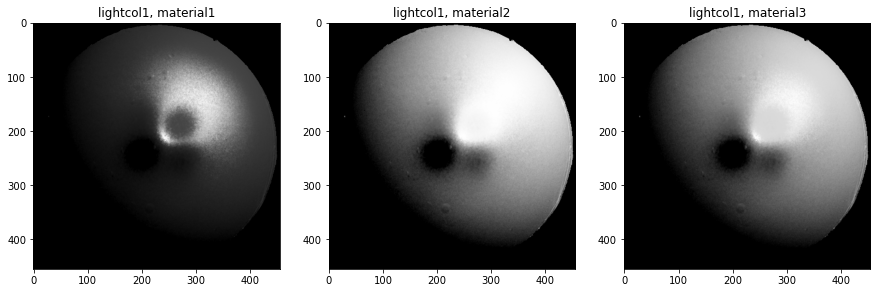

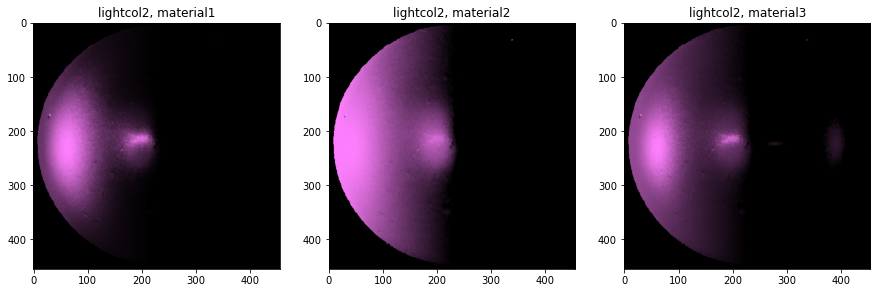

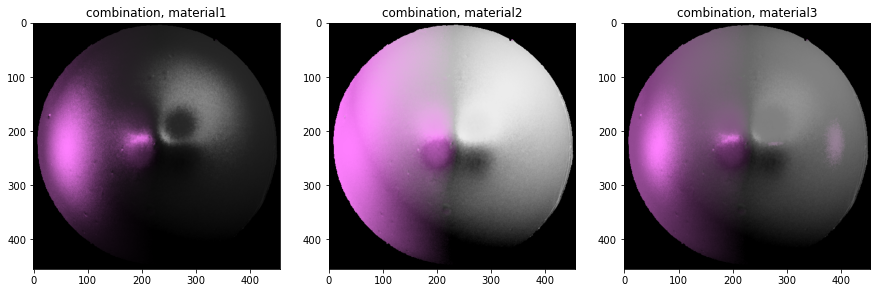

In [11]:
print('Original Sphere')
result1 = phong(sphere, light_direction[:,0,None], light_color[:,0,None], material[0], view, sphere_mask)
result2 = phong(sphere, light_direction[:,0,None], light_color[:,0,None], material[1], view, sphere_mask)
result3 = phong(sphere, light_direction[:,0,None], light_color[:,0,None], material[2], view, sphere_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('lightcol1, material1')
ax1.imshow(result1)
ax2 = fig.add_subplot(132)
ax2.set_title('lightcol1, material2')
ax2.imshow(result2)
ax3 = fig.add_subplot(133)
ax3.set_title('lightcol1, material3')
ax3.imshow(result3)
plt.show()

result4 = phong(sphere, light_direction[:,1,None], light_color[:,1,None], material[0], view, sphere_mask)
result5 = phong(sphere, light_direction[:,1,None], light_color[:,1,None], material[1], view, sphere_mask)
result6 = phong(sphere, light_direction[:,1,None], light_color[:,1,None], material[2], view, sphere_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('lightcol2, material1')
ax1.imshow(result4)
ax2 = fig.add_subplot(132)
ax2.set_title('lightcol2, material2')
ax2.imshow(result5)
ax3 = fig.add_subplot(133)
ax3.set_title('lightcol2, material3')
ax3.imshow(result6)
plt.show()

result7 = phong(sphere, light_direction, light_color, material[0], view, sphere_mask)
result8 = phong(sphere, light_direction, light_color, material[1], view, sphere_mask)
result9 = phong(sphere, light_direction, light_color, material[2], view, sphere_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('combination, material1')
ax1.imshow(result7)
ax2 = fig.add_subplot(132)
ax2.set_title('combination, material2')
ax2.imshow(result8)
ax3 = fig.add_subplot(133)
ax3.set_title('combination, material3')
ax3.imshow(result9)
plt.show()

Diffuse Pear


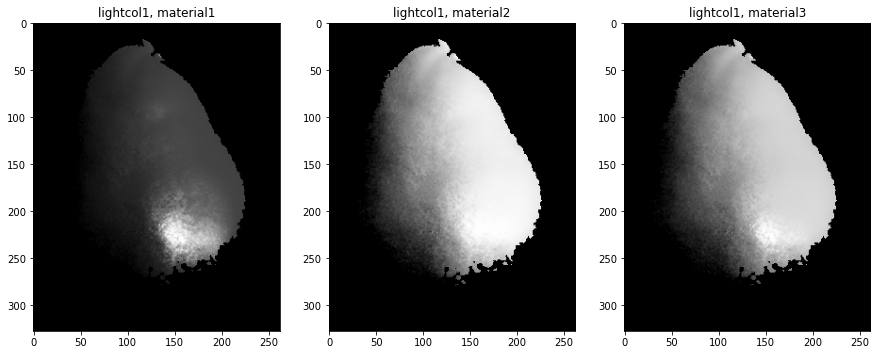

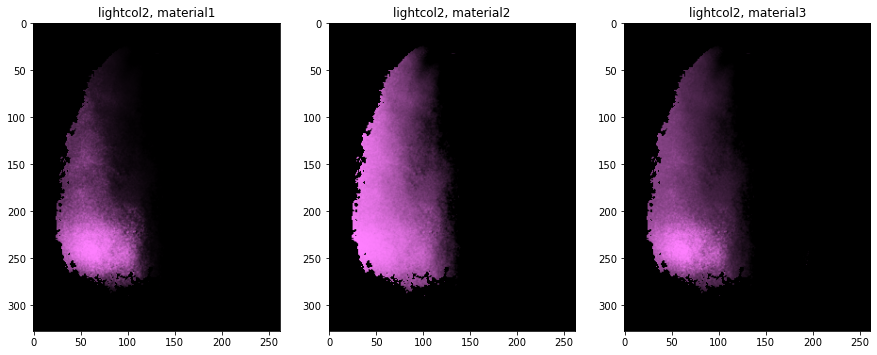

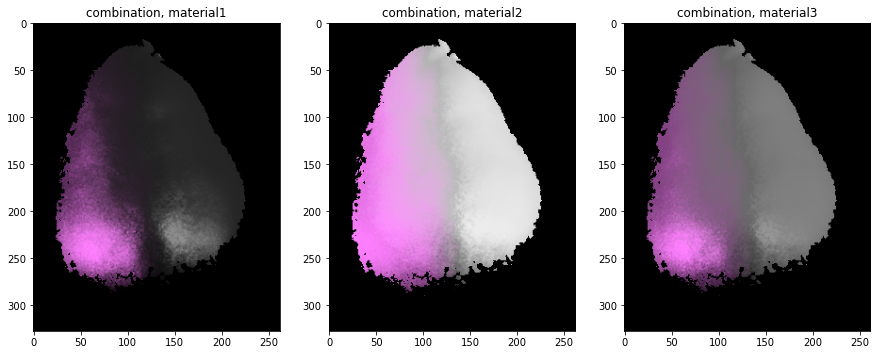

In [12]:
# Output the rendering results for the pear.
view =  np.array([[0],[0],[1]])
material = np.array([[0.1,0.5,5],[0.5,0.1,5],[0.5,0.5,10]])
lightcol1 =  np.array([[-1.0/2,1],[1.0/2,1],[1.0/2,1]])
lightcol2 = np.array([[1,1],[0,0.5],[0,1]])
#Display rendered results for pear for all materials and light sources and combination of light sources

light_direction = np.hstack([lightcol1[:,0,None],lightcol2[:,0,None]])
# print(light_direction)

light_color = np.hstack([lightcol1[:,1,None],lightcol2[:,1,None]])
# print(light_color)

print('Diffuse Pear')
result1 = phong(pear_diffuse, light_direction[:,0,None], light_color[:,0,None], material[0], view, pear_mask)
result2 = phong(pear_diffuse, light_direction[:,0,None], light_color[:,0,None], material[1], view, pear_mask)
result3 = phong(pear_diffuse, light_direction[:,0,None], light_color[:,0,None], material[2], view, pear_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('lightcol1, material1')
ax1.imshow(result1)
ax2 = fig.add_subplot(132)
ax2.set_title('lightcol1, material2')
ax2.imshow(result2)
ax3 = fig.add_subplot(133)
ax3.set_title('lightcol1, material3')
ax3.imshow(result3)
plt.show()

result4 = phong(pear_diffuse, light_direction[:,1,None], light_color[:,1,None], material[0], view, pear_mask)
result5 = phong(pear_diffuse, light_direction[:,1,None], light_color[:,1,None], material[1], view, pear_mask)
result6 = phong(pear_diffuse, light_direction[:,1,None], light_color[:,1,None], material[2], view, pear_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('lightcol2, material1')
ax1.imshow(result4)
ax2 = fig.add_subplot(132)
ax2.set_title('lightcol2, material2')
ax2.imshow(result5)
ax3 = fig.add_subplot(133)
ax3.set_title('lightcol2, material3')
ax3.imshow(result6)
plt.show()

result7 = phong(pear_diffuse, light_direction, light_color, material[0], view, pear_mask)
result8 = phong(pear_diffuse, light_direction, light_color, material[1], view, pear_mask)
result9 = phong(pear_diffuse, light_direction, light_color, material[2], view, pear_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('combination, material1')
ax1.imshow(result7)
ax2 = fig.add_subplot(132)
ax2.set_title('combination, material2')
ax2.imshow(result8)
ax3 = fig.add_subplot(133)
ax3.set_title('combination, material3')
ax3.imshow(result9)
plt.show()

Original Pear


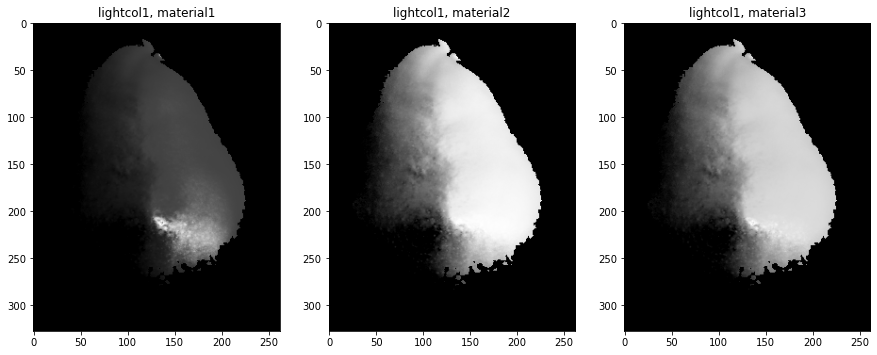

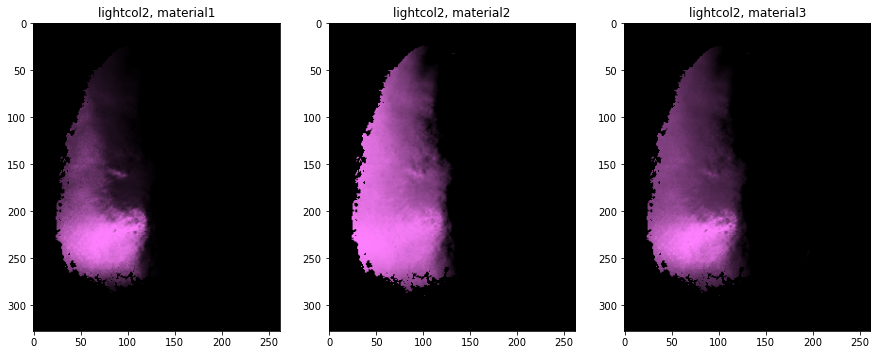

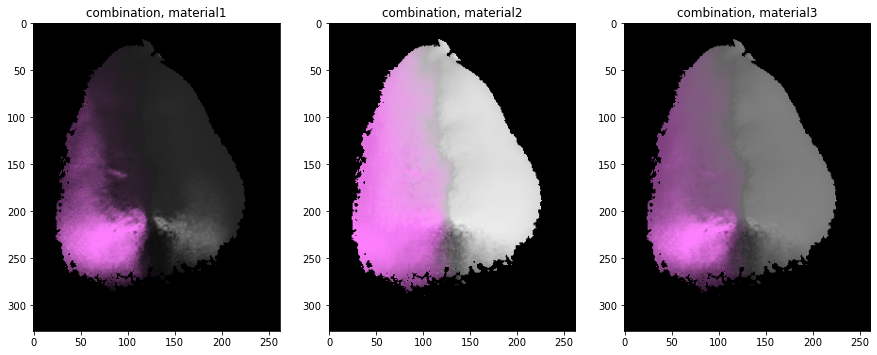

In [13]:
print('Original Pear')
result1 = phong(pear, light_direction[:,0,None], light_color[:,0,None], material[0], view, pear_mask)
result2 = phong(pear, light_direction[:,0,None], light_color[:,0,None], material[1], view, pear_mask)
result3 = phong(pear, light_direction[:,0,None], light_color[:,0,None], material[2], view, pear_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('lightcol1, material1')
ax1.imshow(result1)
ax2 = fig.add_subplot(132)
ax2.set_title('lightcol1, material2')
ax2.imshow(result2)
ax3 = fig.add_subplot(133)
ax3.set_title('lightcol1, material3')
ax3.imshow(result3)
plt.show()

result4 = phong(pear, light_direction[:,1,None], light_color[:,1,None], material[0], view, pear_mask)
result5 = phong(pear, light_direction[:,1,None], light_color[:,1,None], material[1], view, pear_mask)
result6 = phong(pear, light_direction[:,1,None], light_color[:,1,None], material[2], view, pear_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('lightcol2, material1')
ax1.imshow(result4)
ax2 = fig.add_subplot(132)
ax2.set_title('lightcol2, material2')
ax2.imshow(result5)
ax3 = fig.add_subplot(133)
ax3.set_title('lightcol2, material3')
ax3.imshow(result6)
plt.show()

result7 = phong(pear, light_direction, light_color, material[0], view, pear_mask)
result8 = phong(pear, light_direction, light_color, material[1], view, pear_mask)
result9 = phong(pear, light_direction, light_color, material[2], view, pear_mask)
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(131)
ax1.set_title('combination, material1')
ax1.imshow(result7)
ax2 = fig.add_subplot(132)
ax2.set_title('combination, material2')
ax2.imshow(result8)
ax3 = fig.add_subplot(133)
ax3.set_title('combination, material3')
ax3.imshow(result9)
plt.show()

## Problem 4: Photometric Stereo, Specularity Removal (20 pts)

The goal of this problem is to implement a couple of different algorithms that reconstruct a surface using the concept of Lambertian photometric stereo. Additionally, you will implement the specular removal technique of [Mallick et al.](http://www.eecs.harvard.edu/~zickler/download/photodiff_cvpr05_preprint.pdf), which enables photometric stereo to be performed on certain non-Lambertian materials.

You can assume a Lambertian reflectance function once specularities are removed. However, note that the albedo is unknown and non-constant in the images you will use.

As input, your program should take in multiple images along with the light source direction for each image. Each image is associated with only a single light, and hence a single direction.

### Data
You will use synthetic images and specular sphere images as data. These images are stored in `.pickle` files which have been graciously provided by Satya Mallick. Each `.pickle` file contains

* `im1`, `im2`, `im3`, `im4`, ... images.
* `l1`, `l2`, `l3`, `l4`, ... light source directions.

### Part 1: Lambertian Photometric Stereo [8 pts]

Implement the photometric stereo technique described in the lecture. Your program should have two parts:

1. Read in the images and corresponding light source directions, and estimate the surface normals and albedo map.

1. Reconstruct the depth map from the surface normals. You should first try the naive scanline-based "shape by integration" method described in lecture. (You are required to implement this.) For comparison, you should also integrate using the Horn technique which is already implemented for you in the `horn_integrate` function. Note that for good results you will often want to run the `horn_integrate` function with 10000-100000 iterations, which will take a while. For your final submission, we will require that you run Horn integration for 1000 (one thousand) iterations or more in each case. But for debugging, it is suggested that you keep the number of iterations low.

You will find all the data for this part in `synthetic_data.pickle`. Try using only `im1`, `im2` and `im4` first. Display your outputs as mentioned below.

Then use all four images (most accurate).

For **each** of the **two above cases** you must output:

1. The estimated albedo map.

1. The estimated surface normals by showing both
    1. Needle map, and
    1. Three images showing each of the surface normal components.

1. A wireframe of the depth map given by the scanline method.

1. A wireframe of the depth map given by Horn integration.

In total, we expect 2 * 7 = 14 images for this part.

An example of outputs is shown in the figure below. (The example outputs only include one depth map, although we expect two – see above.)

![Problem 4.1 example outputs](problem4_example.png)

Keys:  ['__version__', 'l4', '__header__', 'im1', 'im3', 'im2', 'l2', 'im4', 'l1', '__globals__', 'l3']

Image 1:


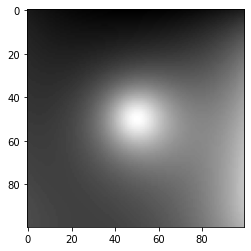

Light source direction: [[0 0 1]]

Image 2:


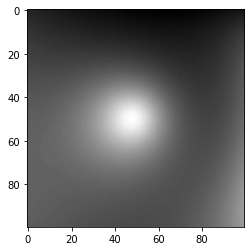

Light source direction: [[0.2 0.  1. ]]

Image 3:


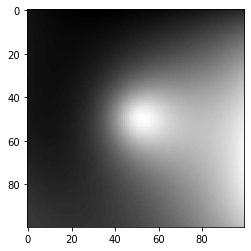

Light source direction: [[-0.2  0.   1. ]]

Image 4:


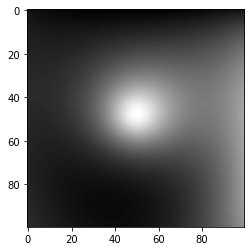

Light source direction: [[0.  0.2 1. ]]


In [14]:
# Setup
import pickle
import numpy as np
from time import time
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt

### Example: how to read and access data from a .pickle file
pickle_in = open("synthetic_data.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# data is a dict which stores each element as a key-value pair. 
print("Keys: ", list(data.keys()))

# To access the value of an entity, refer to it by its key.
for i in range(1, 5):
    print("\nImage %d:" % i)
    plt.imshow(data["im%d" % i], cmap="gray")
    plt.show()
    print("Light source direction: " + str(data["l%d" % i]))

Based on the above images, can you interpret the orientation of the coordinate frame? If we label the axes in order as x, y, z, then the x-axis points left, the y-axis points up, and the z-axis points out of the screen in our direction. (That means this is a left-handed coordinate system. How will this affect the scanline integration algorithm? Hint: if you integrate rightward along the x-axis and downward along the y-axis, you will be doing in opposite directions to the axes, and the partial derivatives you compute may need to be modified.)

_Note: as clarification, no direct response is needed for this cell._

In [15]:
import numpy as np
from scipy.signal import convolve

def horn_integrate(gx, gy, mask, niter):
    """
    horn_integrate recovers the function g from its partial 
    derivatives gx and gy. 
    mask is a binary image which tells which pixels are 
    involved in integration. 
    niter is the number of iterations. 
    typically 100,000 or 200,000, 
    although the trend can be seen even after 1000 iterations.
    """
    g = np.ones(np.shape(gx))
    
    gx = np.multiply(gx, mask)
    gy = np.multiply(gy, mask)
    
    A = np.array([[0,1,0],[0,0,0],[0,0,0]]) #y-1
    B = np.array([[0,0,0],[1,0,0],[0,0,0]]) #x-1
    C = np.array([[0,0,0],[0,0,1],[0,0,0]]) #x+1
    D = np.array([[0,0,0],[0,0,0],[0,1,0]]) #y+1
    
    d_mask = A + B + C + D
    
    den = np.multiply(convolve(mask,d_mask,mode="same"),mask)
    den[den == 0] = 1
    rden = 1.0 / den
    mask2 = np.multiply(rden, mask)
    
    m_a = convolve(mask, A, mode="same")
    m_b = convolve(mask, B, mode="same")
    m_c = convolve(mask, C, mode="same")
    m_d = convolve(mask, D, mode="same")
    
    term_right = np.multiply(m_c, gx) + np.multiply(m_d, gy)
    t_a = -1.0 * convolve(gx, B, mode="same")
    t_b = -1.0 * convolve(gy, A, mode="same")
    term_right = term_right + t_a + t_b
    term_right = np.multiply(mask2, term_right)
    
    for k in range(niter):
        g = np.multiply(mask2, convolve(g, d_mask, mode="same")) + term_right
    
    return g

In [16]:
def photometric_stereo(images, lights, mask, horn_niter=1000):
    
    """mask is an optional parameter which you are encouraged to use.
    It can be used e.g. to ignore the background when integrating the normals.
    It should be created by converting the images to grayscale, averaging them,
    normalizing to [0, 1] and thresholding (only using locations for which the
    pixel value is above some threshold).
    
    The choice of threshold is something you can experiment with,
    but in practice something like 0.05 or 0.1 tends to work well.
    
    You do not need to use the mask for 1a (it shouldn't matter),
    but you SHOULD use it to filter out the background for the specular data (1c).
    """

    """ ==========
    YOUR CODE HERE
    ========== """

    # note:
    # images : (n_ims, h, w)
    # lights : (n_ims, 3)
    # mask   : (h, w)
    

    
    albedo = np.ones(images[0].shape)
    normals = np.dstack((np.zeros(images[0].shape),
                         np.zeros(images[0].shape),
                         np.ones(images[0].shape)))
    H = np.ones(images[0].shape)
    H_horn = np.ones(images[0].shape)
    
    p = np.zeros(images[0].shape)
    q = np.zeros(images[0].shape)
    
    for i in range(images[0].shape[0]):
        for j in range(images[0].shape[1]):
            e = images[:,i,j,None]
            S = lights
            b = np.dot(np.dot(np.linalg.inv(np.dot(S.T, S)), S.T),e)
            albedo[i,j] = np.linalg.norm(b)
            normals[i,j,:] = b.T/albedo[i,j]
            p[i,j] = normals[i,j,0]/normals[i,j,2]
            q[i,j] = normals[i,j,1]/normals[i,j,2]
    
    H[0,0] = 0
    p = p*mask
    q = q*mask
    for i in range(1, images[0].shape[1]):
        H[0,i] = H[0, i-1] + p[0,i]
        
    for j in range(1, images[0].shape[0]):
        H[j ,:] = H[j-1,:] + q[j,:]
    
   
    
    H_horn = horn_integrate(p, q, mask, 1000)
            
    return albedo, normals, H, H_horn

photometric stereo using im1, im2, im4


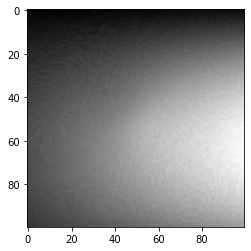

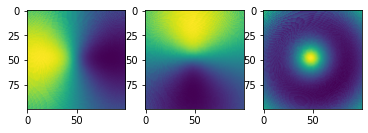

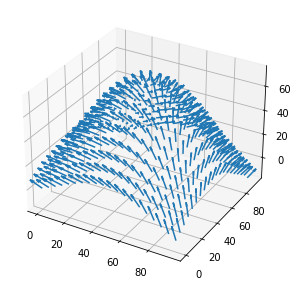

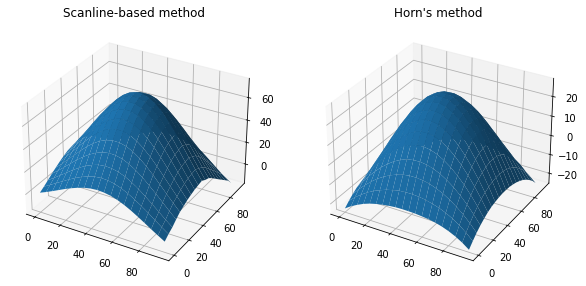

In [17]:
from mpl_toolkits.mplot3d import Axes3D

pickle_in = open("synthetic_data.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

lights = np.vstack((data["l1"], data["l2"], data["l4"]))
# lights = np.vstack((data["l1"], data["l2"], data["l3"], data["l4"]))

images = []
images.append(data["im1"])
images.append(data["im2"])
# images.append(data["im3"])
images.append(data["im4"])
images = np.array(images)

mask = np.ones(data["im1"].shape)

mask = (data["im1"]+data["im2"]+data["im4"])/3
mask[mask<0.05] = 0
mask[mask>=0.05] = 1

albedo, normals, depth, horn = photometric_stereo(images, lights, mask)

# --------------------------------------------------------------------------
# The following code is just a working example so you don't get stuck with any
# of the graphs required. You may want to write your own code to align the
# results in a better layout. You are also free to change the function
# however you wish; just make sure you get all of the required outputs.
# --------------------------------------------------------------------------

def visualize(albedo, normals, depth, horn):
    # Stride in the plot, you may want to adjust it to different images
    stride = 5

    # showing albedo map
    fig = plt.figure()
    albedo_max = albedo.max()
    albedo = albedo / albedo_max
    plt.imshow(albedo, cmap="gray")
    plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # showing normals as quiver
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], stride),
                          np.arange(0,np.shape(normals)[1], stride),
                          np.arange(1))
    X = X[..., 0]
    Y = Y[..., 0]
    Z = depth[::stride,::stride].T
    NX = normals[..., 0][::stride,::-stride].T
    NY = normals[..., 1][::-stride,::stride].T
    NZ = normals[..., 2][::stride,::stride].T
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection='3d')
    # ax = fig.gca(projection='3d')
    plt.quiver(X,Y,Z,NX,NY,NZ, length=10)
    plt.show()

    # plotting wireframe depth map
    H = depth[::stride,::stride]
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    
    # ax = fig.gca(projection='3d')
    ax1.plot_surface(X,Y, H.T)
    ax1.set_title("Scanline-based method")
    

    H = horn[::stride,::stride]
    ax2 = fig.add_subplot(122, projection='3d')
    # ax = fig.gca(projection='3d')
    ax2.plot_surface(X,Y, H.T)
    ax2.set_title("Horn's method")
    plt.show()

print("photometric stereo using im1, im2, im4")
visualize(albedo, normals, depth, horn)

photometric stereo using im1, im2, im3, im4


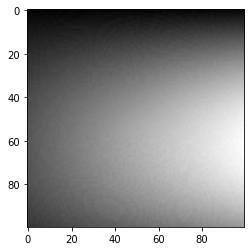

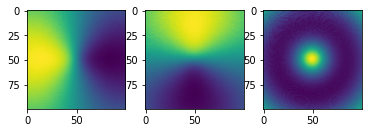

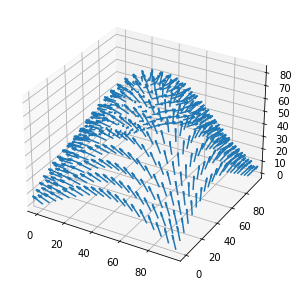

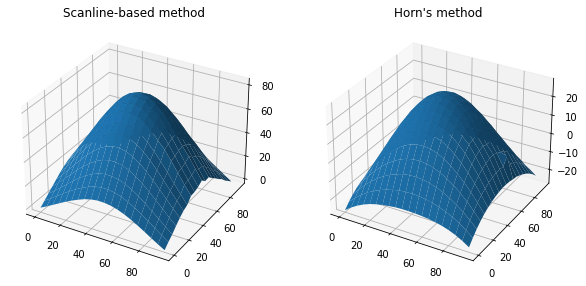

In [18]:
# Don't forget to run your photometric stereo code on TWO sets of images!
# (One being {im1, im2, im4}, and the other being {im1, im2, im3, im4}.)
lights = np.vstack((data["l1"], data["l2"], data["l3"], data["l4"]))

images = []
images.append(data["im1"])
images.append(data["im2"])
images.append(data["im3"])
images.append(data["im4"])
images = np.array(images)

mask = (data["im1"]+data["im2"]+data["im3"]+data["im4"])/4
mask[mask<0.05] = 0
mask[mask>=0.05] = 1

albedo, normals, depth, horn = photometric_stereo(images, lights, mask)

# --------------------------------------------------------------------------
# The following code is just a working example so you don't get stuck with any
# of the graphs required. You may want to write your own code to align the
# results in a better layout. You are also free to change the function
# however you wish; just make sure you get all of the required outputs.
# --------------------------------------------------------------------------

print("photometric stereo using im1, im2, im3, im4")
visualize(albedo, normals, depth, horn)

### Part 2: Specularity Removal [6 pts]

Implement the specularity removal technique described in *Beyond Lambert: Reconstructing Specular Surfaces Using Color* (by Mallick, Zickler, Kriegman, and Belhumeur; CVPR 2005).

Your program should input an RGB image and light source color and output the corresponding SUV image.  

Try this out first with the specular sphere images and then with the pear images.  
  
For each of the specular sphere and pear images, include

1. The original image (in RGB colorspace).

1. The recovered $S$ channel of the image.

1. The recovered diffuse part of the image. Use $D = \sqrt{U^2+V^2}$ to represent the diffuse part.

In total, we expect 2 * 3 = 6 images as outputs for this problem.

Note: You will find all the data for this part in `specular_sphere.pickle` and `specular_pear.pickle`.

In [19]:
def get_rot_mat(rot_v, unit=None):
    '''
    Takes a vector and returns the rotation matrix required to align the
    unit vector(2nd arg) to it.
    '''
    if unit is None:
        unit = [1.0, 0.0, 0.0]
    
    rot_v = rot_v/np.linalg.norm(rot_v)
    uvw = np.cross(rot_v, unit) # axis of rotation

    rcos = np.dot(rot_v, unit) # cos by dot product
    rsin = np.linalg.norm(uvw) # sin by magnitude of cross product

    # normalize and unpack axis
    if not np.isclose(rsin, 0):
        uvw = uvw/rsin
    u, v, w = uvw

    # compute rotation matrix 
    R = (
        rcos * np.eye(3) +
        rsin * np.array([
            [ 0, -w,  v],
            [ w,  0, -u],
            [-v,  u,  0]
        ]) +
        (1.0 - rcos) * uvw[:,None] * uvw[None,:]
    )
    return R

def RGBToSUV(I_rgb, rot_vec):
    '''
    Your implementation which takes an RGB image and a vector encoding
    the orientation of the S channel w.r.t. to RGB.
    '''

    """ ==========
    YOUR CODE HERE
    ========== """

    S = np.ones(I_rgb.shape[:2])
    G = np.ones(I_rgb.shape[:2])
    
    R = get_rot_mat(rot_vec)
    
    for i in range(I_rgb.shape[0]):
        for j in range(I_rgb.shape[1]):
            I_suv = np.dot(R,I_rgb[i,j,:,None])
            S[i,j]= I_suv[0]
            G[i,j] = np.linalg.norm((I_suv[1],I_suv[2]))
    return S, G

pickle_in = open("specular_sphere.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# sample input
S, G = RGBToSUV(data["im1"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0])))


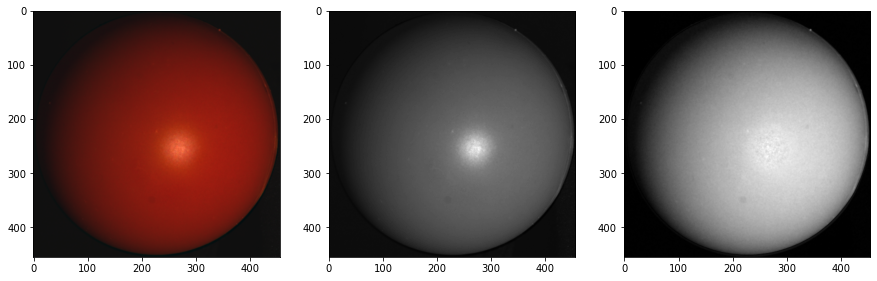

In [20]:
def normalize(img):
    return (img-np.min(img))/(np.max(img) - np.min(img))

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(131)
origin_img = normalize(data['im1'])
ax1.imshow(origin_img)
ax2 = fig.add_subplot(132)
ax2.imshow(S,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(G,cmap='gray')

plt.show()




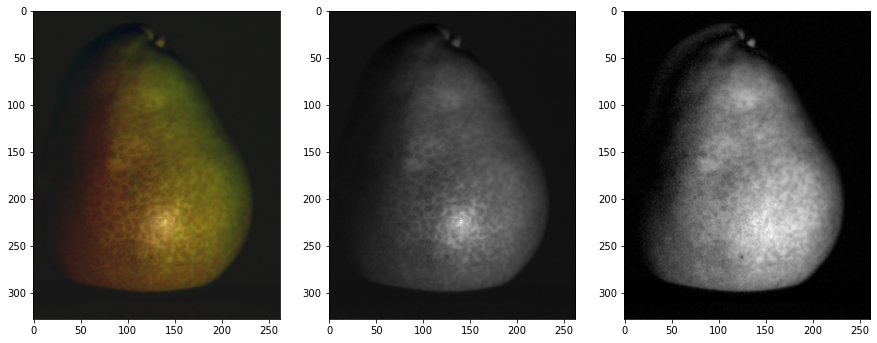

In [21]:
pickle_in = open("specular_pear.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# sample input
S, G = RGBToSUV(data["im1"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0])))

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(131)
origin_img = normalize(data['im1'])
ax1.imshow(origin_img)
ax2 = fig.add_subplot(132)
ax2.imshow(S,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(G,cmap='gray')

plt.show()

### Part 3: Robust Photometric Stereo [6 pts]

Now we will perform photometric stereo on our sphere/pear images which include specularities. First, for comparison, run your photometric stereo code from 1a on the original images (converted to grayscale and rescaled/shifted to be in the range [0, 1]). You should notice erroneous "bumps" in the resulting reconstructions, as a result of violating the Lambertian assumption. For this, show the same outputs as in 1a.

Next, combine parts 1 and 2 by removing the specularities (using your code from 1b) and then running photometric stereo on the diffuse components of the specular sphere/pear images. Our goal will be to remove the bumps/sharp parts in the reconstruction.

For the specular sphere image set in `specular_sphere.pickle`, using all of the four images (again, be sure to convert them to grayscale and normalize them so that their values go from 0 to 1), include:

1. The estimated albedo map (original and diffuse).

1. The estimated surface normals (original and diffuse) by showing both

    1. Needle map, and
    1. Three images showing each of the surface normal components.
    
1. A wireframe of depth map (original and diffuse).

1. A wireframe of the depth map given by Horn integration (original and diffuse).

In total, we expect 2 \* 7 = 14 images for the 1a comparison, plus 2 \* 7 = 14 images for the outputs after specularity removal has been performed. (Thus 28 output images overall.)

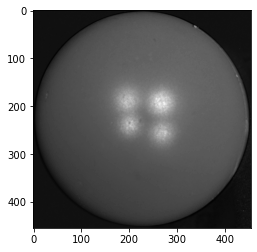

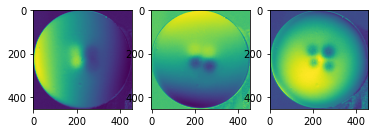

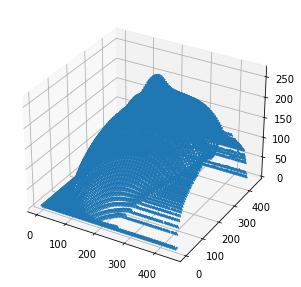

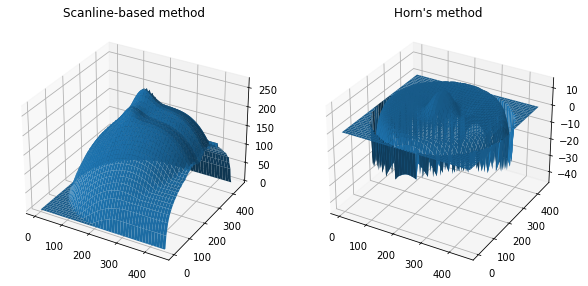

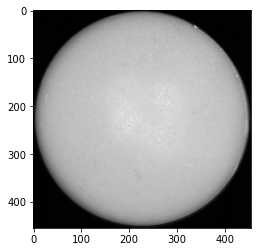

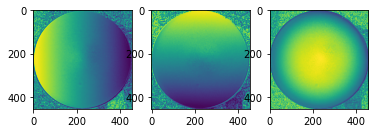

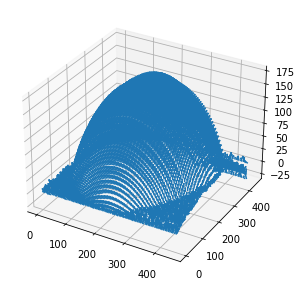

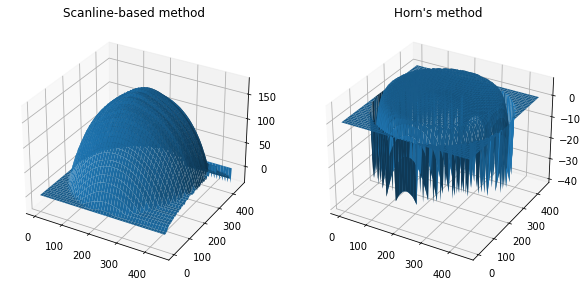

In [22]:
# ---------------------------------------------------------------------------
# You may reuse the code for photometric_stereo here.
# Write your code below to process the data and send it to photometric_stereo
# and display the albedo, normals, and depth maps.
# ---------------------------------------------------------------------------

# sphere
pickle_in = open("specular_sphere.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")
lights = np.vstack((data["l1"], data["l2"], data["l3"], data["l4"]))

images = []
im1 = 1/3 * (data["im1"][:,:,0] + data["im1"][:,:,1] + data["im1"][:,:,2])
im2 = 1/3 * (data["im2"][:,:,0] + data["im2"][:,:,1] + data["im2"][:,:,2])
im3 = 1/3 * (data["im3"][:,:,0] + data["im3"][:,:,1] + data["im3"][:,:,2])
im4 = 1/3 * (data["im4"][:,:,0] + data["im4"][:,:,1] + data["im4"][:,:,2])

im1 = normalize(im1)
im2 = normalize(im2)
im3 = normalize(im3)
im4 = normalize(im4)

mask = (im1+im2+im3+im4)/4
mask[mask<0.1] = 0
mask[mask>=0.1] = 1



images.append(im1)
images.append(im2)
images.append(im3)
images.append(im4)
images = np.array(images)




albedo, normals, depth, horn = photometric_stereo(images, lights, mask)


visualize(albedo, normals, depth, horn)

im1_s, im1_g = RGBToSUV(data["im1"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0]))) 
im2_s, im2_g = RGBToSUV(data["im2"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0]))) 
im3_s, im3_g = RGBToSUV(data["im3"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0]))) 
im4_s, im4_g = RGBToSUV(data["im4"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0]))) 

images_diffuse = []
images_diffuse.append(im1_g)
images_diffuse.append(im2_g)
images_diffuse.append(im3_g)
images_diffuse.append(im4_g)
images_diffuse = np.array(images_diffuse)
albedo, normals, depth, horn = photometric_stereo(images_diffuse, lights, mask)
visualize(albedo, normals, depth, horn)

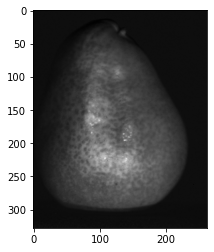

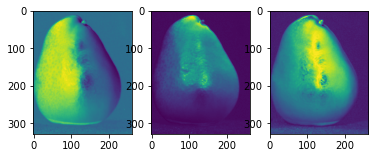

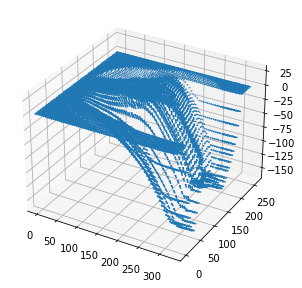

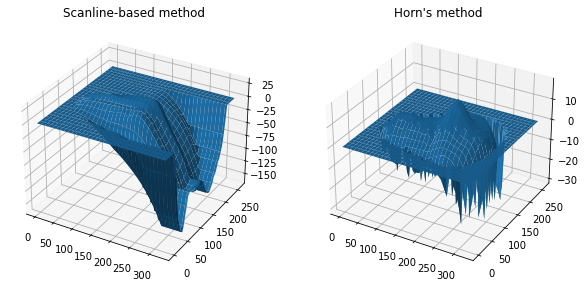

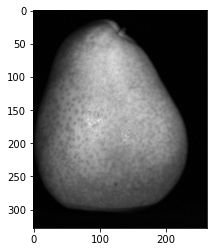

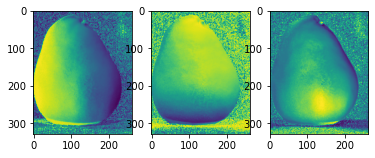

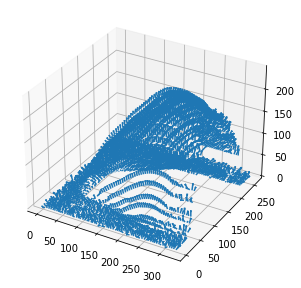

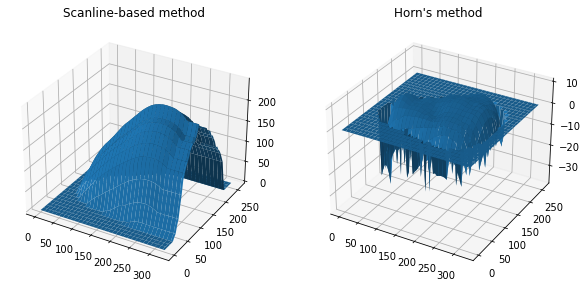

In [23]:
pickle_in = open("specular_pear.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")
lights = np.vstack((data["l1"], data["l2"], data["l3"], data["l4"]))

images = []
im1 = 1/3 * (data["im1"][:,:,0] + data["im1"][:,:,1] + data["im1"][:,:,2])
im2 = 1/3 * (data["im2"][:,:,0] + data["im2"][:,:,1] + data["im2"][:,:,2])
im3 = 1/3 * (data["im3"][:,:,0] + data["im3"][:,:,1] + data["im3"][:,:,2])
im4 = 1/3 * (data["im4"][:,:,0] + data["im4"][:,:,1] + data["im4"][:,:,2])

im1 = normalize(im1)
im2 = normalize(im2)
im3 = normalize(im3)
im4 = normalize(im4)


mask = (im1+im2+im3+im4)/4
mask[mask<0.1] = 0
mask[mask>=0.1] = 1


images.append(im1)
images.append(im2)
images.append(im3)
images.append(im4)
images = np.array(images)


albedo, normals, depth, horn = photometric_stereo(images, lights, mask)


visualize(albedo, normals, depth, horn)

im1_s, im1_g = RGBToSUV(data["im1"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0]))) 
im2_s, im2_g = RGBToSUV(data["im2"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0]))) 
im3_s, im3_g = RGBToSUV(data["im3"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0]))) 
im4_s, im4_g = RGBToSUV(data["im4"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0]))) 

images_diffuse = []
images_diffuse.append(im1_g)
images_diffuse.append(im2_g)
images_diffuse.append(im3_g)
images_diffuse.append(im4_g)
images_diffuse = np.array(images_diffuse)
albedo, normals, depth, horn = photometric_stereo(images_diffuse, lights, mask)
visualize(albedo, normals, depth, horn)